In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [5]:
#强度调制函数
def intensity_modulation_function(t,te):
    return (t/te)*math.exp(1-t/te)

In [6]:
# 场地时变圆频率
def soil_time_dependent_circular_frequency(t,td):
    return 10.47-2*t/td

In [7]:
#场地时变阻尼比
def soil_damping_ratio(t,td):
    return 0.8+0.2*t/td

In [8]:
# 功率谱随时间变化的强度
def time_varying_intensity(wg_t,yita_t,a_max,theta_p):
    return a_max**2/(math.pi*(theta_p**2)*wg_t*(2*yita_t+1/(2*yita_t)))

In [9]:
def generate_seismic_excitation(t,td,te,w,a_max,theta_p):
    wg_t=soil_time_dependent_circular_frequency(t,td)
    yita_t=soil_damping_ratio(t,td)
    g_t=intensity_modulation_function(t,te)
    S_t=time_varying_intensity(wg_t,yita_t,a_max,theta_p)
    S_w_t=(
        (wg_t**4+4*(yita_t**2)*(wg_t**2)*(w**2))/((wg_t**2-w**2)**2+4*(yita_t**2)*(wg_t**2)*(w**2))
    )*(g_t**2)*S_t
    return S_w_t

In [10]:
def get_acc(td,te,a_max,theta_p,dt):
    Seismic_excitation=[]
    for t in np.arange(0,td,dt):
        x, _ = quad(lambda w: np.sqrt( generate_seismic_excitation(t,td,te,w,a_max,theta_p))* np.exp(-1j * w * t), 0, np.inf)
        Seismic_excitation.append(x)
    return Seismic_excitation

In [11]:
td=60  #持续时间
te_s=[7,8,9,10]
a_max_s=[1.0,1.1,1.2,1.3]
theta_p_s=[2.6,2.7,2.8,2.9,3.0]
dt=0.02       #时间步为 0.02秒

acc_s=[]
acc_s.append(np.arange(0,td,dt))
for te in te_s:
    for a_max in a_max_s:
        for theta_p in theta_p_s:
            Seismic_excitation=get_acc(td,te,a_max,theta_p,dt)
            acc_s.append(np.array(Seismic_excitation))

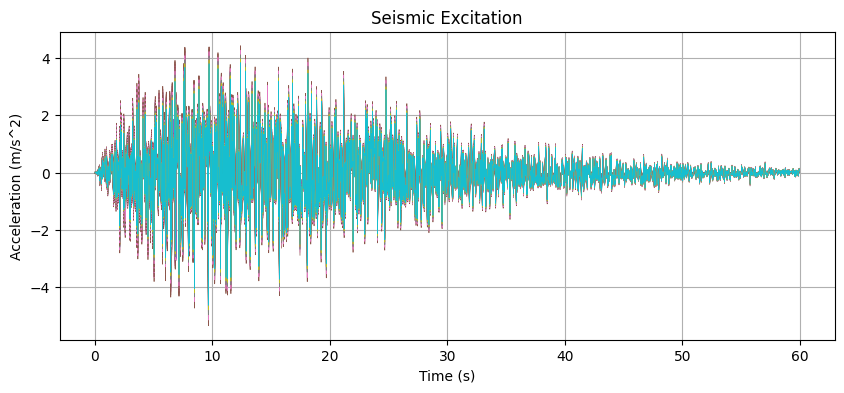

In [12]:
plt.figure(figsize=(10,4))
for acc in acc_s[1:]:
    plt.plot(np.arange(0,td,dt),acc,linewidth=0.5)
plt.title('Seismic Excitation')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.grid(True)
plt.show()

In [13]:
pd.DataFrame(acc_s).to_csv("地震加速度_3000.csv")